In [59]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import mlcrate as mlc
import os
import gc
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import time
%matplotlib inline

pal = sns.color_palette()
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

#make wider graphs
sns.set(rc={'figure.figsize':(12,5)});
plt.figure(figsize=(12,5));

['publishers_09feb12.csv', 'publishers_23feb12.csv', 'clicks_09feb12.csv', 'clicks_08mar12.csv', 'publishers_08mar12.csv', 'clicks_23feb12.csv']


<Figure size 864x360 with 0 Axes>

In [60]:
pub1 = pd.read_csv('../input/publishers_08mar12.csv')
pub2 = pd.read_csv('../input/publishers_09feb12.csv')
pub3= pd.read_csv('../input/publishers_23feb12.csv')

frames = [pub1,pub2,pub3]

pub = pd.concat(frames,sort=True)

click1 = pd.read_csv('../input/clicks_08mar12.csv')
click2 = pd.read_csv('../input/clicks_09feb12.csv')
click3 = pd.read_csv('../input/clicks_23feb12.csv')

frames2 =[click1,click2,click3]

click = pd.concat(frames2,sort=True)

In [61]:
pub.head(10)

,address,bankAccount,bankaccount,partnerid,status
0,tle0ao6u67qaiwgmek4817o3w,NaN,NaN,dv91f,OK
1,j8hl8uuipl5ku56ere498tcwn,hlshfjmd9ftb7uf7wquuv9r3y,NaN,dv8sy,OK
2,rzqk95gpqy16bebgwo8znpbav,NaN,NaN,dv8sd,OK
3,tpsxjzmzmfjnkg516gtfz28es,fx11691shvf7vevzvfe38cavz,NaN,dv8pz,OK
4,i82qiiajfajw7aetq583gci4p,rjt5cv6fhxs4af54i22dolwh6,NaN,dv8pa,OK
5,itxoual8oz1k8ne18vmhxj9m5,NaN,NaN,dv8oy,OK
6,jcw48lpqqoohqmsiv8wcu2jyv,q42n3h4oa2m8m5c6jagem3oq1,NaN,dv8oi,OK
7,lxvr9zmpha5arbqfuk18x0npe,nii5t9chvd2coifhuv4ox9z9d,NaN,dv8ea,OK
8,ig918u7wftkrvebmtcji4t4v3,l40rcuz0oqsdqevhv54f4ulzv,NaN,dv8j5,OK
9,r4u2mni0swhvplnedav4giw7z,i57ecdhnysvtdfpdmsln9s1fj,NaN,dv85k,OK


In [62]:
click.head(10)

,agent,category,cid,cntr,id,iplong,partnerid,referer,timeat
0,SonyEricsson_K70,ad,dsfag,us,9794476,1071324855,dv3va,NaN,2012-03-08 00:00:00.0
1,Samsung_S5233,mg,dswae,in,9794474,1000461055,dv4gs,riflql2a0yv8xoa9sq0recx4x,2012-03-08 00:00:00.0
2,Nokia_C3-00,co,dr75h,py,9794471,3386484265,duq7h,NaN,2012-03-08 00:00:00.0
3,Nokia_5233,es,ds3xq,vn,9794468,1907981997,dv6i3,gp53lqr9njqd6z2ap5d364sip,2012-03-08 00:00:00.0
4,MAUI,ad,dvb8g,in,9794467,1791989091,duxto,NaN,2012-03-08 00:00:00.0
5,Nokia_3110c,ad,dvb8g,in,9794466,1791002478,dusg4,NaN,2012-03-08 00:00:00.0
6,Blackberry_9300,es,dtr0u,es,9794477,1353590316,du6dt,h5njsswvxorsau9u8fxh0e9se,2012-03-08 00:00:00.0
7,NokiaC6-01.3,mc,dsgcn,ru,9794478,1402285217,dusnc,NaN,2012-03-08 00:00:00.0
8,Nokia_C3-00,mc,dr6sg,th,9794481,1848747204,dvry3,oj0rekb51pvirnjuqjt10zn4b,2012-03-08 00:00:01.0
9,NokiaC2-03,co,dr6x2,id,9794482,1893182670,du77a,r63f8uhijvr2irvka3glwyb38,2012-03-08 00:00:01.0


In [63]:
data = pd.merge(click, pub, on='partnerid')

COLUMN Description :

partnerid - partnerid - Unique identifier of a publisher.

Bankaccount - Bank account associated with a publisher (may be empty)

address - Mailing address of a publisher (obfuscated; may be empty)

status - Label of a publisher, which can be the following:
"OK" - Publishers whom BuzzCity deems as having healthy traffic (or those who slipped their detection mechanisms)
"Observation" - Publishers who may have just started their traffic or their traffic statistics deviates from system wide average. BuzzCity does not have any conclusive stand with these publishers yet
"Fraud" - Publishers who are deemed as fraudulent with clear proof. Buzzcity suspends their accounts and their earnings will not be paid


agent - deviceua - Phone model used by a clicker/visitor

category - publisherchannel - Publisher's channel type, which can be the following:
ad - Adult sites
co - Community
es - Entertainment and lifestyle
gd - Glamour and dating
in - Information
mc - Mobile content
pp - Premium portal
se - Search, portal, services
mg - 
ow - 

cid - adscampaignid - Unique identifier of a given advertisement campaign

cntr - usercountry - Country from which the surfer is

id - id - Unique identifier of a particular click

iplong - numericip - Public IP address of a clicker/visitor

referer - referredurl - URL where the ad banners were clicked (obfuscated; may be empty). 

timeat - clicktime - Timestamp of a given click (in YYYY-MM-DD format)

partnerid - publisherid - Unique identifier of a publisher


In [64]:
data.head(10)

,agent,category,cid,cntr,id,iplong,partnerid,referer,timeat,address,bankAccount,bankaccount,status
0,SonyEricsson_K70,ad,dsfag,us,9794476,1071324855,dv3va,NaN,2012-03-08 00:00:00.0,g9rffau0b792mpai1m3gj20a3,NaN,NaN,OK
1,Nokia_2730c,ad,drvnr,au,9794499,1868310973,dv3va,NaN,2012-03-08 00:00:02.0,g9rffau0b792mpai1m3gj20a3,NaN,NaN,OK
2,Nokia_2330c,ad,dvfqu,ke,9794726,3301565714,dv3va,tbuyyyoychgjo1ndlucxgt9o6,2012-03-08 00:00:11.0,g9rffau0b792mpai1m3gj20a3,NaN,NaN,OK
3,SonyEricsson_W20,ad,dsftc,iq,9794828,1605039771,dv3va,thqfa0sa55mqsv58thp2f4mig,2012-03-08 00:00:15.0,g9rffau0b792mpai1m3gj20a3,NaN,NaN,OK
4,Samsung_GT-B3210,ad,du4v5,za,9794839,3309442764,dv3va,gbb407skm0shiglvo2tekqo7r,2012-03-08 00:00:16.0,g9rffau0b792mpai1m3gj20a3,NaN,NaN,OK
5,Nokia_3110c,ad,ds7fx,in,9794863,3756266415,dv3va,NaN,2012-03-08 00:00:17.0,g9rffau0b792mpai1m3gj20a3,NaN,NaN,OK
6,MAUI,ad,dr753,in,9794981,247611896,dv3va,NaN,2012-03-08 00:00:23.0,g9rffau0b792mpai1m3gj20a3,NaN,NaN,OK
7,MAUI,ad,dvfqo,ke,9795279,3316713263,dv3va,NaN,2012-03-08 00:00:36.0,g9rffau0b792mpai1m3gj20a3,NaN,NaN,OK
8,Nokia_500,ad,ds455,bn,9795326,3399005716,dv3va,qcfc7pdq80q9jqdjn9t4iqra6,2012-03-08 00:00:38.0,g9rffau0b792mpai1m3gj20a3,NaN,NaN,OK
9,SonyEricsson_K70,ad,dsfag,us,9795408,1071324855,dv3va,NaN,2012-03-08 00:00:42.0,g9rffau0b792mpai1m3gj20a3,NaN,NaN,OK


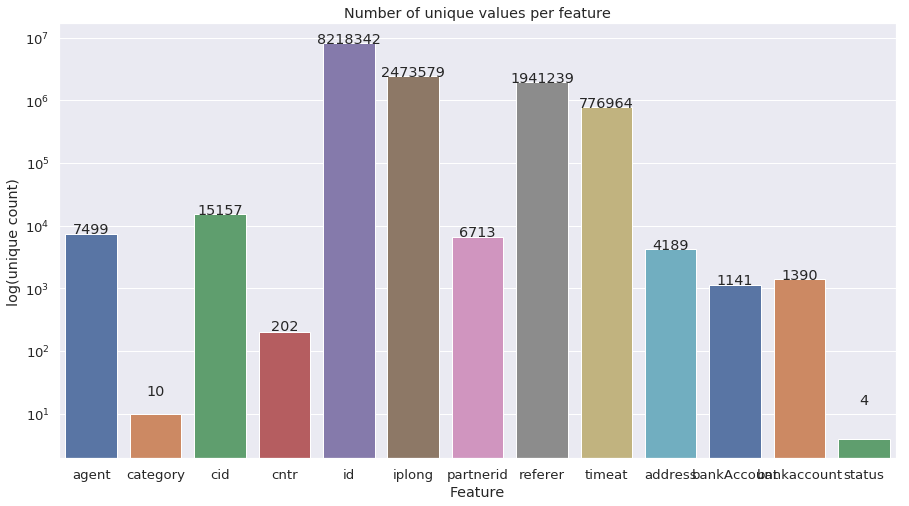

In [65]:
plt.figure(figsize=(15, 8))
cols = data.columns
uniques = [len(data[col].unique()) for col in cols]
sns.set(font_scale=1.2)
ax = sns.barplot(cols, uniques, palette=pal, log=True)
ax.set(xlabel='Feature', ylabel='log(unique count)', title='Number of unique values per feature')
for p, uniq in zip(ax.patches, uniques):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 10,
            uniq,
            ha="center") 

In [66]:
train = data.drop(['id','address','bankAccount','bankaccount'],axis = 1)

In [67]:
train.head()

,agent,category,cid,cntr,iplong,partnerid,referer,timeat,status
0,SonyEricsson_K70,ad,dsfag,us,1071324855,dv3va,NaN,2012-03-08 00:00:00.0,OK
1,Nokia_2730c,ad,drvnr,au,1868310973,dv3va,NaN,2012-03-08 00:00:02.0,OK
2,Nokia_2330c,ad,dvfqu,ke,3301565714,dv3va,tbuyyyoychgjo1ndlucxgt9o6,2012-03-08 00:00:11.0,OK
3,SonyEricsson_W20,ad,dsftc,iq,1605039771,dv3va,thqfa0sa55mqsv58thp2f4mig,2012-03-08 00:00:15.0,OK
4,Samsung_GT-B3210,ad,du4v5,za,3309442764,dv3va,gbb407skm0shiglvo2tekqo7r,2012-03-08 00:00:16.0,OK


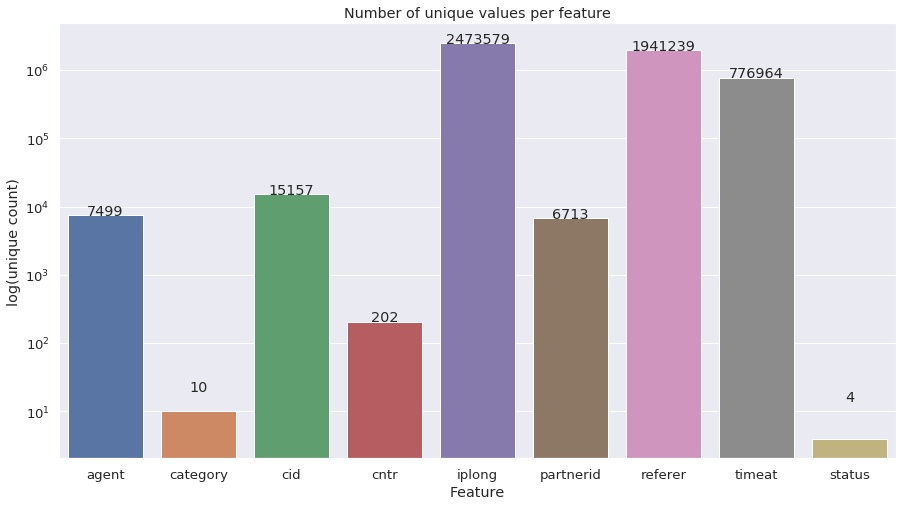

In [69]:
plt.figure(figsize=(15, 8))
cols = train.columns
uniques = [len(train[col].unique()) for col in cols]
sns.set(font_scale=1.2)
ax = sns.barplot(cols, uniques, palette=pal, log=True)
ax.set(xlabel='Feature', ylabel='log(unique count)', title='Number of unique values per feature')
for p, uniq in zip(ax.patches, uniques):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 10,
            uniq,
            ha="center") 

In [70]:
train.isnull().sum()

agent          28187
category           0
cid                0
cntr           16324
iplong             0
partnerid          0
referer      6470793
timeat             0
status             0
dtype: int64

In [71]:
train.category.unique()

array(['ad', 'mg', 'co', 'es', 'mc', 'se', 'pp', 'in', 'ow', 'gd'],
      dtype=object)

In [72]:
train.status.unique()

array(['OK', 'Fraud', 'Observation', 'Observation_New'], dtype=object)

In [73]:
train.status = train.status.replace('Observation_New','Observation')

In [74]:
train.status.unique()

array(['OK', 'Fraud', 'Observation'], dtype=object)

In [75]:
train.to_csv('train.csv')